In [1]:
# lets import the required libraries and packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("telecom_churn_data.csv")

In [3]:
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [4]:
# as moble number is unique identifier we will keep it as index
data.set_index("mobile_number")

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
mobile_number,,,,,,,,,,,,,,,,,,,,,
7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,...,0,1.0,1.0,1.0,NaN,968,30.40,0.00,101.20,3.58
7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,355.074,...,0,NaN,1.0,1.0,NaN,1006,0.00,0.00,0.00,0.00
7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,189.058,...,0,NaN,NaN,NaN,1.0,1103,0.00,0.00,4.17,0.00
7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,251.102,...,0,NaN,NaN,NaN,NaN,2491,0.00,0.00,0.00,0.00
7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,309.876,...,0,0.0,NaN,NaN,NaN,1526,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7001548952,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,18.471,69.161,...,0,NaN,NaN,NaN,NaN,3199,0.00,0.00,0.00,0.00
7000607688,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,112.201,77.811,...,0,NaN,NaN,NaN,NaN,2052,0.00,0.00,0.00,0.00
7000087541,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,229.187,0.000,...,0,1.0,NaN,NaN,NaN,185,0.00,0.00,0.00,0.00


In [5]:
data.shape

(99999, 226)

In [6]:
data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [7]:
data.isnull().sum()

mobile_number        0
circle_id            0
loc_og_t2o_mou    1018
std_og_t2o_mou    1018
loc_ic_t2o_mou    1018
                  ... 
aon                  0
aug_vbc_3g           0
jul_vbc_3g           0
jun_vbc_3g           0
sep_vbc_3g           0
Length: 226, dtype: int64

In [8]:
# Percentage of missing values (column-wise)
round(100*(data.isnull().sum()/len(data.index)), 2)

mobile_number     0.00
circle_id         0.00
loc_og_t2o_mou    1.02
std_og_t2o_mou    1.02
loc_ic_t2o_mou    1.02
                  ... 
aon               0.00
aug_vbc_3g        0.00
jul_vbc_3g        0.00
jun_vbc_3g        0.00
sep_vbc_3g        0.00
Length: 226, dtype: float64

In [9]:
# Set the threshold for missing values (30%)
threshold = 0.30

# List columns with more than 30% missing values
missing_columns = data.columns[data.isna().mean() > threshold]

print("Columns with more than 30% missing values:", missing_columns)

Columns with more than 30% missing values: Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9',
       'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6',
       'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'av_rech_amt_data_9', 'arpu_3g_6', 'arpu_3g_7',
       'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
       'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
       'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9'],
      dtype='object')


In [10]:
#drop missing columns which are more than 30%
data=data.drop(missing_columns,axis=1)

In [11]:
data.shape

(99999, 186)

In [12]:
# Identify date columns (assuming you know they contain dates)
date_columns = [col for col in data.columns if 'date' in col.lower()]
date_columns

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9']

In [13]:
#Dropping the date columns
data=data.drop(columns=date_columns)
data.shape

(99999, 178)

In [14]:
#Taking average of 6th and 7th month
data['avg_rech_amt_6_7'] = (data['total_rech_amt_6'] + data['total_rech_amt_7'])/2

In [15]:
data['avg_rech_amt_6_7']

0        307.0
1        229.0
2        241.5
3        270.0
4        273.0
         ...  
99994     85.0
99995    110.0
99996     59.5
99997    369.5
99998    355.0
Name: avg_rech_amt_6_7, Length: 99999, dtype: float64

In [16]:
#Calculating the 70th percentile of the average recharge amount in the first two months
X=data['avg_rech_amt_6_7'].quantile(0.7)
X

368.5

In [17]:
data=data[data['avg_rech_amt_6_7']>=X]
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
7,7000701601,109,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.84,...,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0
8,7001524846,109,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,...,0,0,0,0,315,21.03,910.65,122.16,0.0,519.0
13,7002191713,109,0.0,0.0,0.0,492.846,205.671,593.260,322.732,501.76,...,0,0,0,0,2607,0.00,0.00,0.00,0.0,380.0
16,7000875565,109,0.0,0.0,0.0,430.975,299.869,187.894,206.490,50.51,...,0,0,0,0,511,0.00,2.45,21.89,0.0,459.0
17,7000187447,109,0.0,0.0,0.0,690.008,18.980,25.499,257.583,1185.91,...,0,0,0,0,667,0.00,0.00,0.00,0.0,408.0


In [18]:
data.shape

(30011, 179)

Here we can see than we got approx 30K rows

In [19]:
data['churn'] = (
    (data['total_ic_mou_9'] == 0) &
    (data['total_og_mou_9'] == 0) &
    (data['vol_2g_mb_9'] == 0) &
    (data['vol_3g_mb_9'] == 0)
)

# Tag churners (1) and non-churners (0)
data['churn'] = data['churn'].astype(int)

In [20]:
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7,churn
7,7000701601,109,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.84,...,0,0,0,802,57.74,19.38,18.74,0.0,1185.0,1
8,7001524846,109,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,...,0,0,0,315,21.03,910.65,122.16,0.0,519.0,0
13,7002191713,109,0.0,0.0,0.0,492.846,205.671,593.260,322.732,501.76,...,0,0,0,2607,0.00,0.00,0.00,0.0,380.0,0
16,7000875565,109,0.0,0.0,0.0,430.975,299.869,187.894,206.490,50.51,...,0,0,0,511,0.00,2.45,21.89,0.0,459.0,0
17,7000187447,109,0.0,0.0,0.0,690.008,18.980,25.499,257.583,1185.91,...,0,0,0,667,0.00,0.00,0.00,0.0,408.0,0


In [21]:
#Calculating churn and non churn data
data['churn'].value_counts()/len(data['churn'])*100

0    91.359835
1     8.640165
Name: churn, dtype: float64

In [22]:
data.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6',
       ...
       'sachet_3g_7', 'sachet_3g_8', 'sachet_3g_9', 'aon', 'aug_vbc_3g',
       'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g', 'avg_rech_amt_6_7', 'churn'],
      dtype='object', length=180)

In [23]:
# Remove attributes corresponding to the 'churn' phase
col1 = [col for col in data.columns if col.endswith('_9')]
data = data.drop(columns=col1)

In [24]:
data.shape

(30011, 138)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30011 entries, 7 to 99997
Columns: 138 entries, mobile_number to churn
dtypes: float64(110), int32(1), int64(27)
memory usage: 31.7 MB


In [26]:
# lets check for columns that can be changed to integers, floats or date types
object_col_data = data.select_dtypes(include=['object'])
print(object_col_data.iloc[0])

Series([], Name: 7, dtype: float64)


In [27]:
(data.isnull().sum() * 100 / len(data)).sort_values(ascending = False)

std_og_t2m_mou_8      3.125521
loc_og_t2c_mou_8      3.125521
std_ic_t2m_mou_8      3.125521
loc_og_t2f_mou_8      3.125521
std_ic_t2o_mou_8      3.125521
                        ...   
max_rech_amt_7        0.000000
max_rech_amt_8        0.000000
last_day_rch_amt_6    0.000000
last_day_rch_amt_7    0.000000
churn                 0.000000
Length: 138, dtype: float64

In [28]:
# lets check the correlation amongst the features, drop the highly correlated ones
cor = data.corr()
cor

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7,churn
mobile_number,1.000000,NaN,NaN,NaN,NaN,0.014114,0.009008,0.018085,-0.012364,-0.015901,...,-0.005937,-0.006469,-0.007831,0.315073,-0.024077,-0.020006,-0.031117,-0.007777,0.015007,-0.039318
circle_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loc_og_t2o_mou,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std_og_t2o_mou,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loc_ic_t2o_mou,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
jul_vbc_3g,-0.020006,NaN,NaN,NaN,NaN,0.123912,0.170103,0.137574,-0.091039,-0.087778,...,0.090188,0.082814,0.067555,0.028173,0.710976,1.000000,0.684767,0.166819,0.152340,-0.048225
jun_vbc_3g,-0.031117,NaN,NaN,NaN,NaN,0.173104,0.114663,0.119829,-0.083373,-0.088550,...,0.081590,0.072926,0.063063,0.019177,0.595241,0.684767,1.000000,0.153393,0.144399,-0.031403
sep_vbc_3g,-0.007777,NaN,NaN,NaN,NaN,0.066414,0.080661,0.124008,-0.030663,-0.029744,...,0.072138,0.056910,0.062348,0.013342,0.208195,0.166819,0.153393,1.000000,0.074067,-0.039560
avg_rech_amt_6_7,0.015007,NaN,NaN,NaN,NaN,0.868980,0.890903,0.737228,0.229757,0.229061,...,0.035079,0.044061,0.031252,-0.008322,0.139873,0.152340,0.144399,0.074067,1.000000,0.016692


In [29]:
data.isnull().sum()

mobile_number         0
circle_id             0
loc_og_t2o_mou      114
std_og_t2o_mou      114
loc_ic_t2o_mou      114
                   ... 
jul_vbc_3g            0
jun_vbc_3g            0
sep_vbc_3g            0
avg_rech_amt_6_7      0
churn                 0
Length: 138, dtype: int64

In [30]:
# lets check the dataset again
Col_drop1= (data.isnull().sum() * 100 / len(data)).sort_values(ascending = False)
Col_drop1

std_og_t2m_mou_8      3.125521
loc_og_t2c_mou_8      3.125521
std_ic_t2m_mou_8      3.125521
loc_og_t2f_mou_8      3.125521
std_ic_t2o_mou_8      3.125521
                        ...   
max_rech_amt_7        0.000000
max_rech_amt_8        0.000000
last_day_rch_amt_6    0.000000
last_day_rch_amt_7    0.000000
churn                 0.000000
Length: 138, dtype: float64

In [31]:
threshold = 0.0 # 0% in decimal form

# Identify columns with 0% or more missing values
Col_drop11 = Col_drop1[Col_drop1 > threshold].index.tolist()
Col_drop11


['std_og_t2m_mou_8',
 'loc_og_t2c_mou_8',
 'std_ic_t2m_mou_8',
 'loc_og_t2f_mou_8',
 'std_ic_t2o_mou_8',
 'std_og_mou_8',
 'loc_og_t2m_mou_8',
 'loc_ic_t2m_mou_8',
 'loc_og_mou_8',
 'loc_og_t2t_mou_8',
 'isd_og_mou_8',
 'roam_og_mou_8',
 'std_ic_mou_8',
 'std_ic_t2t_mou_8',
 'roam_ic_mou_8',
 'spl_og_mou_8',
 'std_ic_t2f_mou_8',
 'offnet_mou_8',
 'og_others_8',
 'loc_ic_mou_8',
 'onnet_mou_8',
 'spl_ic_mou_8',
 'std_og_t2t_mou_8',
 'std_og_t2f_mou_8',
 'loc_ic_t2f_mou_8',
 'isd_ic_mou_8',
 'loc_ic_t2t_mou_8',
 'ic_others_8',
 'std_og_t2c_mou_8',
 'std_og_t2c_mou_6',
 'std_ic_t2f_mou_6',
 'og_others_6',
 'std_og_mou_6',
 'isd_og_mou_6',
 'std_ic_t2m_mou_6',
 'std_og_t2f_mou_6',
 'std_ic_t2t_mou_6',
 'loc_ic_mou_6',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2m_mou_6',
 'spl_og_mou_6',
 'std_ic_t2o_mou_6',
 'roam_og_mou_6',
 'loc_og_t2t_mou_6',
 'ic_others_6',
 'isd_ic_mou_6',
 'onnet_mou_6',
 'offnet_mou_6',
 'roam_ic_mou_6',
 'spl_ic_mou_6',
 'std_og_t2m_mou_6',
 'loc_ic_t2f_mou_6',
 'loc_og_t2m_m

In [32]:
# Drop the identified columns
data = data.drop(columns=Col_drop11)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30011 entries, 7 to 99997
Data columns (total 48 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   mobile_number       30011 non-null  int64  
 1   circle_id           30011 non-null  int64  
 2   arpu_6              30011 non-null  float64
 3   arpu_7              30011 non-null  float64
 4   arpu_8              30011 non-null  float64
 5   total_og_mou_6      30011 non-null  float64
 6   total_og_mou_7      30011 non-null  float64
 7   total_og_mou_8      30011 non-null  float64
 8   total_ic_mou_6      30011 non-null  float64
 9   total_ic_mou_7      30011 non-null  float64
 10  total_ic_mou_8      30011 non-null  float64
 11  total_rech_num_6    30011 non-null  int64  
 12  total_rech_num_7    30011 non-null  int64  
 13  total_rech_num_8    30011 non-null  int64  
 14  total_rech_amt_6    30011 non-null  int64  
 15  total_rech_amt_7    30011 non-null  int64  
 16  tota

In [49]:
data.columns

Index(['mobile_number', 'arpu_6', 'arpu_7', 'arpu_8', 'total_og_mou_6',
       'total_og_mou_7', 'total_og_mou_8', 'total_ic_mou_6', 'total_ic_mou_7',
       'total_ic_mou_8', 'total_rech_num_6', 'total_rech_num_7',
       'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7',
       'total_rech_amt_8', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'last_day_rch_amt_6', 'last_day_rch_amt_7',
       'last_day_rch_amt_8', 'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8',
       'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'monthly_2g_6',
       'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7',
       'sachet_2g_8', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8',
       'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'aon', 'aug_vbc_3g',
       'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g', 'avg_rech_amt_6_7', 'churn'],
      dtype='object')

In [34]:
data.isnull().sum()

mobile_number         0
circle_id             0
arpu_6                0
arpu_7                0
arpu_8                0
total_og_mou_6        0
total_og_mou_7        0
total_og_mou_8        0
total_ic_mou_6        0
total_ic_mou_7        0
total_ic_mou_8        0
total_rech_num_6      0
total_rech_num_7      0
total_rech_num_8      0
total_rech_amt_6      0
total_rech_amt_7      0
total_rech_amt_8      0
max_rech_amt_6        0
max_rech_amt_7        0
max_rech_amt_8        0
last_day_rch_amt_6    0
last_day_rch_amt_7    0
last_day_rch_amt_8    0
vol_2g_mb_6           0
vol_2g_mb_7           0
vol_2g_mb_8           0
vol_3g_mb_6           0
vol_3g_mb_7           0
vol_3g_mb_8           0
monthly_2g_6          0
monthly_2g_7          0
monthly_2g_8          0
sachet_2g_6           0
sachet_2g_7           0
sachet_2g_8           0
monthly_3g_6          0
monthly_3g_7          0
monthly_3g_8          0
sachet_3g_6           0
sachet_3g_7           0
sachet_3g_8           0
aon             

In [35]:
## Dropping circle_id as it is npt needed for analysis
data.drop('circle_id', axis=1, inplace=True)

### Training and testing the data

In [36]:
# Split data into features (X) and target (y)
X = data.drop(columns=['churn'])
y = data['churn']

In [37]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform training data with the scaler
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same transformation to test data
X_test_scaled = scaler.transform(X_test)

# Creating a PCA object with a specified number of components
pca = PCA(n_components=10)

# Fit and transform scaled training data with PCA
X_train_pca = pca.fit_transform(X_train_scaled)

# Applying the same transformation to scaled test data
X_test_pca = pca.transform(X_test_scaled)

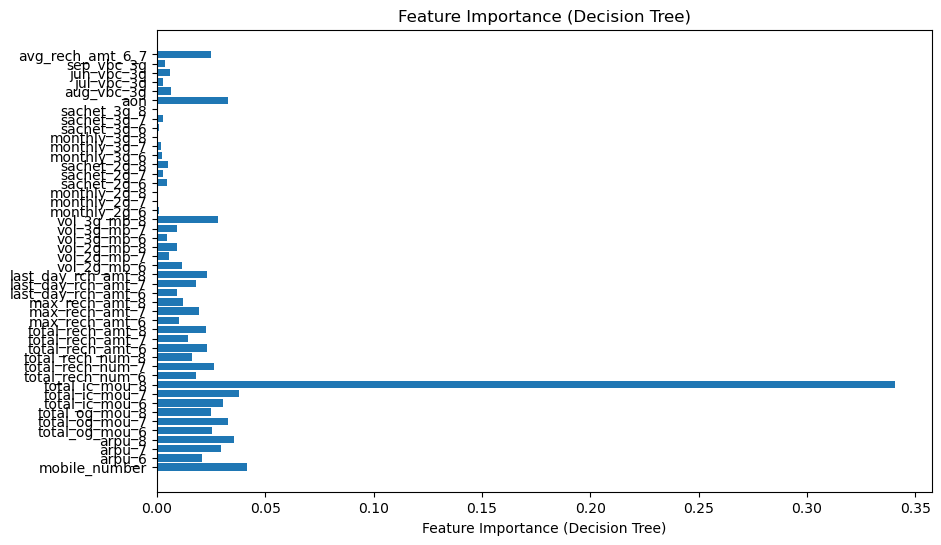

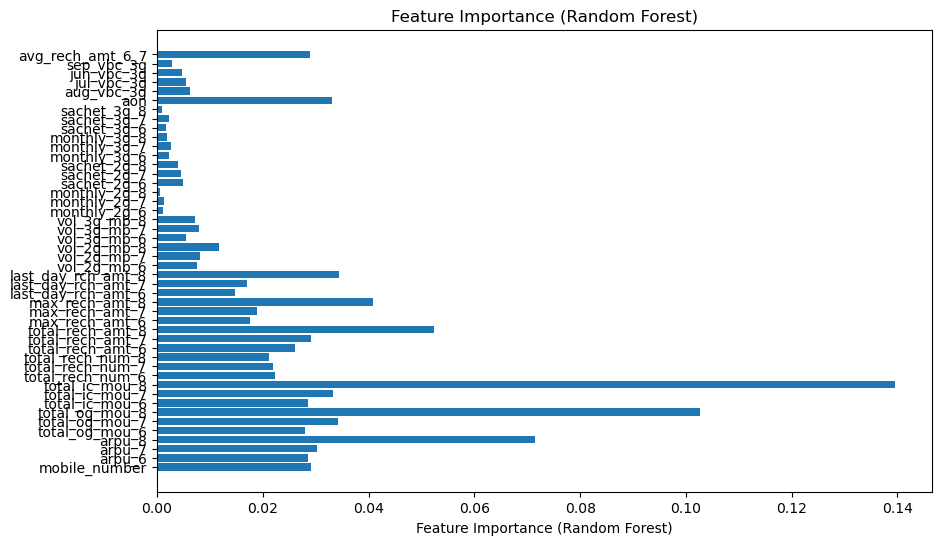

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      5476
           1       0.00      0.00      0.00       527

    accuracy                           0.91      6003
   macro avg       0.46      0.50      0.48      6003
weighted avg       0.83      0.91      0.87      6003

Decision Tree Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      5476
           1       0.46      0.50      0.48       527

    accuracy                           0.90      6003
   macro avg       0.71      0.72      0.71      6003
weighted avg       0.91      0.90      0.91      6003

Random Forest Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      5476
           1       0.75      0.49      0.59       527

    accuracy                           0.94      6003
   macro avg       0.85      0.74      0.78      6003
we

In [39]:
# Logistic Regression
logistic_model1 = LogisticRegression()
logistic_model1.fit(X_train, y_train)

# Decision Tree
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

# Random Forest
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)

# Decision Tree Feature Importance
decision_tree_feature_importance = decision_tree_model.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(X.columns, decision_tree_feature_importance)
plt.xlabel('Feature Importance (Decision Tree)')
plt.title('Feature Importance (Decision Tree)')
plt.show()

# Random Forest Feature Importance
random_forest_feature_importance = random_forest_model.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(X.columns, random_forest_feature_importance)
plt.xlabel('Feature Importance (Random Forest)')
plt.title('Feature Importance (Random Forest)')
plt.show()

# Make predictions
y_pred_logistic = logistic_model1.predict(X_test)
y_pred_decision_tree = decision_tree_model.predict(X_test)
y_pred_random_forest = random_forest_model.predict(X_test)

# Evaluate the models
print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_logistic))

print("Decision Tree Report:")
print(classification_report(y_test, y_pred_decision_tree))

print("Random Forest Report:")
print(classification_report(y_test, y_pred_random_forest))

In [40]:
# Create a PCA object with a specified number of components
pca = PCA(n_components=10)  

# Fit and transform training data
X_train_pca = pca.fit_transform(X_train)

# Applying the same transformation to test data
X_test_pca = pca.transform(X_test)

# Training Decision Tree model on the transformed training data
decision_tree_model_pca = DecisionTreeClassifier()
decision_tree_model_pca.fit(X_train_pca, y_train)

# Make predictions using the PCA-transformed test data
y_pred_dt = decision_tree_model_pca.predict(X_test_pca)

# Evaluate the Decision Tree model with PCA
report_dt_pca = classification_report(y_test, y_pred_dt)
print("Decision Tree Report with PCA:\n", report_dt_pca)

Decision Tree Report with PCA:
               precision    recall  f1-score   support

           0       0.94      0.93      0.94      5476
           1       0.35      0.37      0.36       527

    accuracy                           0.88      6003
   macro avg       0.64      0.65      0.65      6003
weighted avg       0.89      0.88      0.89      6003



In [41]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

actual_labels_train = y_train  
# model's predictions for training data
predicted_labels_train = decision_tree_model_pca.predict(X_train_pca)  

actual_labels_test = y_test  
predicted_labels_test = decision_tree_model_pca.predict(X_test_pca)  

# model's predictions for test data

# Calculate accuracy, sensitivity (recall), and specificity for training data
accuracy_train = accuracy_score(actual_labels_train, predicted_labels_train)
confusion_train = confusion_matrix(actual_labels_train, predicted_labels_train)
tn_train, fp_train, fn_train, tp_train = confusion_train.ravel()
sensitivity_train = tp_train / (tp_train + fn_train)
specificity_train = tn_train / (tn_train + fp_train)

print("Training Data Metrics:")
print(f"Accuracy: {accuracy_train:.2f}")
print(f"Sensitivity (Recall): {sensitivity_train:.2f}")
print(f"Specificity: {specificity_train:.2f}")

# Calculate accuracy, sensitivity (recall), and specificity for test data
accuracy_test = accuracy_score(actual_labels_test, predicted_labels_test)
confusion_test = confusion_matrix(actual_labels_test, predicted_labels_test)
tn_test, fp_test, fn_test, tp_test = confusion_test.ravel()
sensitivity_test = tp_test / (tp_test + fn_test)
specificity_test = tn_test / (tn_test + fp_test)

print("\nTest Data Metrics:")
print(f"Accuracy: {accuracy_test:.2f}")
print(f"Sensitivity (Recall): {sensitivity_test:.2f}")
print(f"Specificity: {specificity_test:.2f}")


Training Data Metrics:
Accuracy: 1.00
Sensitivity (Recall): 1.00
Specificity: 1.00

Test Data Metrics:
Accuracy: 0.88
Sensitivity (Recall): 0.37
Specificity: 0.93


In [42]:
from sklearn.ensemble import RandomForestClassifier

# Create a PCA object with a specified number of components
pca = PCA(n_components=10) 
X_train_pca = pca.fit_transform(X_train)

X_test_pca = pca.transform(X_test)

random_forest_model_pca = RandomForestClassifier()
random_forest_model_pca.fit(X_train_pca, y_train)

y_pred_rf = random_forest_model_pca.predict(X_test_pca)

# Evaluating the Random Forest model with PCA
report_rf_pca = classification_report(y_test, y_pred_rf)
print("Random Forest Report with PCA:\n", report_rf_pca)

Random Forest Report with PCA:
               precision    recall  f1-score   support

           0       0.93      0.98      0.96      5476
           1       0.63      0.29      0.39       527

    accuracy                           0.92      6003
   macro avg       0.78      0.64      0.68      6003
weighted avg       0.91      0.92      0.91      6003



In [43]:
actual_labels_train = y_train  
# model's predictions for training data
predicted_labels_train = random_forest_model_pca.predict(X_train_pca)  
actual_labels_test = y_test  
predicted_labels_test = random_forest_model_pca.predict(X_test_pca) 

accuracy_train = accuracy_score(actual_labels_train, predicted_labels_train)
confusion_train = confusion_matrix(actual_labels_train, predicted_labels_train)
tn_train, fp_train, fn_train, tp_train = confusion_train.ravel()
sensitivity_train = tp_train / (tp_train + fn_train)
specificity_train = tn_train / (tn_train + fp_train)

print("Random Forest Training Data Metrics:")
print(f"Accuracy: {accuracy_train:.2f}")
print(f"Sensitivity (Recall): {sensitivity_train:.2f}")
print(f"Specificity: {specificity_train:.2f}")

# Calculate accuracy, sensitivity (recall), and specificity for test data
accuracy_test = accuracy_score(actual_labels_test, predicted_labels_test)
confusion_test = confusion_matrix(actual_labels_test, predicted_labels_test)
tn_test, fp_test, fn_test, tp_test = confusion_test.ravel()
sensitivity_test = tp_test / (tp_test + fn_test)
specificity_test = tn_test / (tn_test + fp_test)

print("\nRandom Forest Test Data Metrics:")
print(f"Accuracy: {accuracy_test:.2f}")
print(f"Sensitivity (Recall): {sensitivity_test:.2f}")
print(f"Specificity: {specificity_test:.2f}")

Random Forest Training Data Metrics:
Accuracy: 1.00
Sensitivity (Recall): 1.00
Specificity: 1.00

Random Forest Test Data Metrics:
Accuracy: 0.92
Sensitivity (Recall): 0.29
Specificity: 0.98


In [44]:
print("Number of features in X_train:", X_train.shape[1])
print("Number of features in X_test:", X_test.shape[1])

Number of features in X_train: 46
Number of features in X_test: 46


In [45]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30011 entries, 7 to 99997
Data columns (total 46 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   mobile_number       30011 non-null  int64  
 1   arpu_6              30011 non-null  float64
 2   arpu_7              30011 non-null  float64
 3   arpu_8              30011 non-null  float64
 4   total_og_mou_6      30011 non-null  float64
 5   total_og_mou_7      30011 non-null  float64
 6   total_og_mou_8      30011 non-null  float64
 7   total_ic_mou_6      30011 non-null  float64
 8   total_ic_mou_7      30011 non-null  float64
 9   total_ic_mou_8      30011 non-null  float64
 10  total_rech_num_6    30011 non-null  int64  
 11  total_rech_num_7    30011 non-null  int64  
 12  total_rech_num_8    30011 non-null  int64  
 13  total_rech_amt_6    30011 non-null  int64  
 14  total_rech_amt_7    30011 non-null  int64  
 15  total_rech_amt_8    30011 non-null  int64  
 16  max_

### Some insights on the above data

The Random Forest model performs significantly better than the Decision Tree model on both training and test data.
It has a higher accuracy and specificity, which indicates that the Random Forest model is better at correctly classifying non-churn (0) cases. This is important for avoiding false alarms and not misclassifying loyal customers.


The Decision Tree model appears to be overfitting the training data, as evidenced by the perfect accuracy, sensitivity, and specificity on the training data but lower performance on the test data. Overfitting means the model has learned the training data too well and struggles to generalize to unseen data.


The Random Forest model has a high accuracy and specificity on the training data, suggesting that it's doing an excellent job of identifying non-churn cases.
On the test data, the Random Forest model maintains a reasonably high accuracy and specificity, which indicates its ability to generalize well to unseen data.

The sensitivity (recall) for both models is low, especially on the test data. This implies that both models struggle to correctly identify customers who are likely to churn (churn=1). It's essential to improve this aspect of the models to reduce false negatives.

The specificity is relatively high, indicating that the models are good at identifying non-churn cases. This is important for not mistakenly categorizing loyal customers as churners.

### Feature importances 

Top 10 Important Features:
          Feature  Importance
5  total_og_mou_7    0.158805
1          arpu_6    0.143309
7  total_ic_mou_6    0.105981
8  total_ic_mou_7    0.095118
4  total_og_mou_6    0.092979
6  total_og_mou_8    0.084929
3          arpu_8    0.084453
2          arpu_7    0.082973
9  total_ic_mou_8    0.079465
0   mobile_number    0.071988


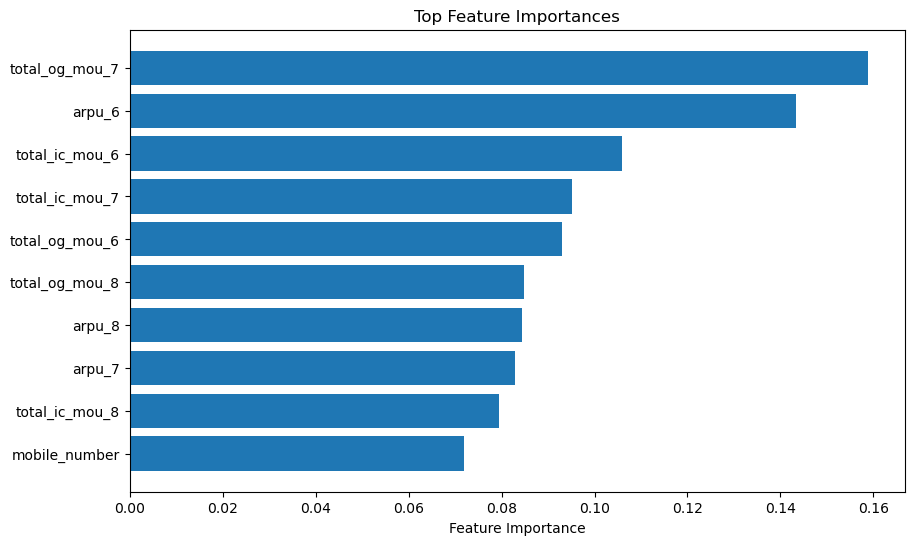

In [47]:
feature_importances = random_forest_model_pca.feature_importances_

# Creating a DataFrame to store feature names and their corresponding importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns[:len(feature_importances)], 'Importance': feature_importances})

# Sort the DataFrame by feature importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the top N important features (e.g., top 10 features)
top_N = 10
print("Top", top_N, "Important Features:")
print(feature_importance_df.head(top_N))
##This code ensures that both the feature names and importances have the same length and allows you to print the top N important features based on their importance.

# Create a horizontal bar graph to visualize feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:top_N], feature_importance_df['Importance'][:top_N])
plt.xlabel('Feature Importance')
plt.title('Top Feature Importances')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important feature at the top
plt.show()